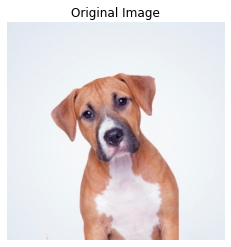

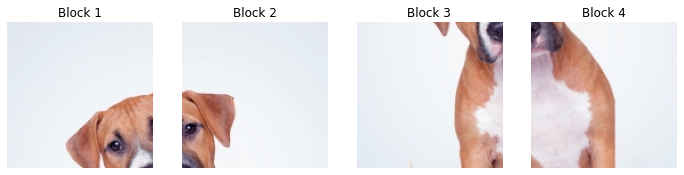

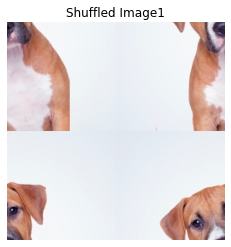

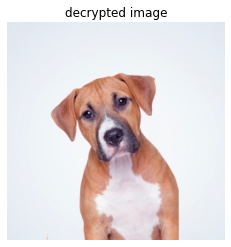

Shuffled image saved as 'shuffled_image1.jpg'


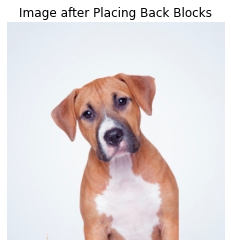

Shuffled image is not the same as the original image


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def divide_into_4_blocks(image):
    height, width, channels = image.shape
    half_height = height // 2
    half_width = width // 2
    
    blocks = [
        image[:half_height, :half_width, :],
        image[:half_height, half_width:, :],
        image[half_height:, :half_width, :],
        image[half_height:, half_width:, :]
    ]
    
    return blocks

def shuffle_blocks(blocks):
    original_order = np.arange(len(blocks))
    shuffled_order = np.random.permutation(original_order)
    
    # Check if the shuffled order is the same as the original order
    while np.array_equal(shuffled_order, original_order):
        shuffled_order = np.random.permutation(original_order)
    
    shuffled_blocks = np.array(blocks)[shuffled_order]
    return shuffled_blocks, shuffled_order

def reconstruct_image(blocks, order):
    height, width, channels = blocks[0].shape
    reconstructed_image = np.zeros((height*2, width*2, channels), dtype=np.uint8)
    
    reconstructed_image[:height, :width, :] = blocks[order[0]]
    reconstructed_image[:height, width:, :] = blocks[order[1]]
    reconstructed_image[height:, :width, :] = blocks[order[2]]
    reconstructed_image[height:, width:, :] = blocks[order[3]]
    
    return reconstructed_image

# Load the image
image_path = r"C:\Users\Asus\python image encryption\images\ogdog.jpg"  # Replace with the actual path
original_image = cv2.imread(image_path)
image_path2 = r"C:\Users\Asus\python image encryption\chaotic_decrypted_image.jpg"  # Replace with the actual path
image_2 = cv2.imread(image_path2)

# Display original image
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

# Divide image into 4 blocks
blocks = divide_into_4_blocks(original_image)
blocks2=divide_into_4_blocks(image_2)

# Display blocks before rearranging
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
for i, block in enumerate(blocks):
    axs[i].imshow(cv2.cvtColor(block, cv2.COLOR_BGR2RGB))
    axs[i].set_title(f'Block {i+1}')
    axs[i].axis('off')
plt.show()

# Shuffle blocks randomly
shuffled_blocks, shuffle_order = shuffle_blocks(blocks)

# Display the shuffled image
shuffled_image1 = reconstruct_image(blocks, shuffle_order)
plt.imshow(cv2.cvtColor(shuffled_image1, cv2.COLOR_BGR2RGB))
plt.title('Shuffled Image1')
plt.axis('off')
plt.show()

# Display the decrypted image
decrypted_image = reconstruct_image(blocks, np.arange(4))
plt.imshow(cv2.cvtColor(decrypted_image, cv2.COLOR_BGR2RGB))
plt.title('decrypted image')
plt.axis('off')
plt.show()

# Save the shuffled image
cv2.imwrite(r"C:\Users\Asus\python image encryption\shuffled_image1.jpg", shuffled_image1)
print("Shuffled image saved as 'shuffled_image1.jpg'")

# Place back the blocks in the original order
original_order_image = reconstruct_image(blocks, np.arange(4))
plt.imshow(cv2.cvtColor(original_order_image, cv2.COLOR_BGR2RGB))
plt.title('Image after Placing Back Blocks')
plt.axis('off')
plt.show()
if not np.array_equal(shuffled_image1, original_image):
    print("Shuffled image is not the same as the original image")
else:
    print("Shuffled image is the same as the original image")



In [3]:
import numpy as np

def chaotic_map(mu, x, n):
    """Iterate the given chaotic map for 'n' iterations."""
    result = []
    for _ in range(n):
        x = np.pi * np.cos(mu * x) + mu * np.sin(2 * np.pi * x)
        result.append(x)
    return np.array(result)

def approximate_entropy(x, m, r):
    N = len(x)
    
    # Embed the time series data into m-dimensional vectors
    X = np.array([x[i:i+m] for i in range(N-m+1)])

    # Calculate distance matrix
    D = np.zeros((N-m+1, N-m+1))
    for i in range(N-m+1):
        for j in range(N-m+1):
            D[i, j] = np.max(np.abs(X[i, :] - X[j, :]))

    # Count the number of pairs where the distance is less than r
    C = np.sum(D < r, axis=1)

    # Calculate the probabilities
    P = C / (N - m + 1)

    # Approximate Entropy calculation
    ApEn_result = np.mean(np.log(P))

    return ApEn_result

# Example usage with your chaotic map equation
mu_parameter = 0.1
initial_condition = 0.1
chaotic_map_iterations = 1000
embedding_dimension = 2
tolerance_parameter = 0.2

chaotic_map_values = chaotic_map(mu_parameter, initial_condition, chaotic_map_iterations)
ApEn_result = approximate_entropy(chaotic_map_values, embedding_dimension, tolerance_parameter)

print('Approximate Entropy:', ApEn_result)


Approximate Entropy: 0.0
